In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set_style('whitegrid') 

In [12]:
%matplotlib inline

In [48]:
saveas_path = '/Users/jamie/insight_data/figures/'

In [19]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [20]:
np.array(X_df.columns)

array(['Goal', 'Campaign_days', 'Title_n_words', 'Blurb_n_words',
       'Has_video', 'N_rewards', 'Min_reward', 'Median_reward',
       'Max_reward', 'Reward_ship_days', 'N_links', 'N_figs',
       'Body_n_words', 'N_creator_backed', 'N_creator_created', 'art',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film', 'food',
       'games', 'journalism', 'music', 'photography', 'publishing',
       'technology', 'theater', 'Ships_intn', 'Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'Sun'], dtype=object)

In [21]:
np.shape(X_df)

(115196, 38)

In [15]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

logistic = linear_model.LogisticRegression()

In [25]:
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [38]:
%matplotlib qt

In [46]:
pca.fit(X_df)

plt.figure(1, figsize=(6*1.618, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [47]:
print(pca.explained_variance_ratio_[0:5]) 

[  9.99979408e-01   1.94427802e-05   8.73297487e-07   2.15051872e-07
   2.97694922e-08]


In [49]:
plt.savefig(saveas_path + 'pca_explained_variance.png',bbox_inches='tight',dpi=400) 

In [50]:
X_pca = pca.transform(X_df)

In [59]:
import pylab as pl
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rb')
    target_ids = range(len(target_names))
    pl.figure(figsize=(6*1.618,6))
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.xlabel('Primary component 1')
    pl.ylabel('Primary component 2')
    
    pl.legend()

In [60]:
plot_PCA_2D(X_pca, outcomes_df['Outcome'].values,\
            ['failure','sucess'])

In [61]:
plt.savefig(saveas_path + 'predictors pc1 pc2.png',bbox_inches='tight',dpi=400) 

In [66]:
def plot_PCA_2D_loglog(data, target, target_names):
    colors = cycle('rb')
    target_ids = range(len(target_names))
    pl.figure(figsize=(6*1.618,6))
    for i, c, label in zip(target_ids, colors, target_names):
        pl.loglog(data[target == i, 0], data[target == i, 1],
                   '.',c=c, label=label)
    pl.xlabel('Primary component 1')
    pl.ylabel('Primary component 2')
    
    pl.legend()

In [67]:
plot_PCA_2D_loglog(X_pca, outcomes_df['Outcome'].values,\
            ['failure','sucess'])

In [68]:
plt.savefig(saveas_path + 'predictors pc1 pc2 loglog.png',bbox_inches='tight',dpi=400) 

In [29]:
n_components = [5, 20,30]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))

In [30]:
X_train, X_test, y_train, y_test = \
    cross_validation.train_test_split(X_df, outcomes_df['Outcome'].values, \
                                      test_size=0.25, random_state=2) # was 0

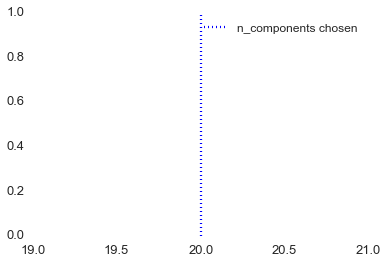

In [31]:
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))